In [1]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    cv2.imshow('Our Live Sketch', frame)
    if cv2.waitKey(1)==13:
        break

cap.release()
cv2.destroyAllWindows()

True
[[[199 194 215]
  [199 194 215]
  [197 194 215]
  ...
  [144 146 155]
  [149 147 166]
  [148 146 165]]

 [[194 194 214]
  [195 195 215]
  [193 195 215]
  ...
  [142 144 157]
  [146 144 162]
  [147 145 163]]

 [[186 194 209]
  [187 195 210]
  [192 197 213]
  ...
  [140 142 153]
  [142 144 157]
  [146 147 161]]

 ...

 [[ 41  35  33]
  [ 42  36  34]
  [ 39  37  37]
  ...
  [ 84 105 112]
  [ 85 106 113]
  [ 89 111 118]]

 [[ 42  33  34]
  [ 41  32  33]
  [ 40  34  32]
  ...
  [ 90 104 112]
  [ 86 105 110]
  [ 87 106 111]]

 [[ 48  40  47]
  [ 45  36  44]
  [ 48  35  43]
  ...
  [ 91 104 117]
  [ 92 105 120]
  [ 92 105 120]]]


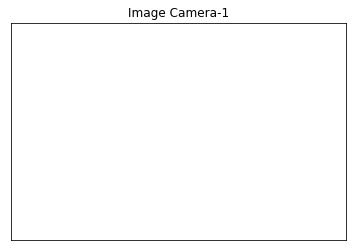

In [4]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(0)

if cap.isOpened():
    ret, frame = cap.read()
    print(ret)
    print(frame)
else:
    ret = False

img1 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

#plt.imshow(img1)
plt.title('Image Camera-1')
plt.xticks([])
plt.yticks([])
plt.show()

cap.release()

In [1]:
# Scaling resizing and interplotation
import cv2
import numpy as pd

img = cv2.imread('lena.jpg')

cv2.imshow('Original Image',img)
cv2.waitKey(0)

# Let's make the size of our image 3/4 of it's original size
img_scaled = cv2.resize(img, None, fx=0.75, fy=0.75)
cv2.imshow('Scaling -Linear Interplotation', img_scaled)
cv2.waitKey()

#Let's doubled the size of our image
img_scaled1 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
cv2.imshow('Scaling - Cubic Interplotation', img_scaled1)
cv2.waitKey()

#Let's skew the re-sizing by setting exact dimensions
img_scaled2 = cv2.resize(img, (900, 400), interpolation=cv2.INTER_AREA)
cv2.imshow('Scaling - Skewed Size', img_scaled2)
cv2.waitKey()

cv2.destroyAllWindows()


In [2]:
#Edge Detection
import cv2
import numpy as np

img = cv2.imread("lena.jpg",0)


height,width = img.shape


#Extract slop edges
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)


cv2.imshow('Original Image',img)
cv2.waitKey(0)

cv2.imshow('Sobel X Image',sobel_x)
cv2.waitKey(0)

cv2.imshow('Sobel Y Image',sobel_y)
cv2.waitKey(0)

sobel_Or = cv2.bitwise_or(sobel_x,sobel_y)
cv2.imshow('Sobel or Image',sobel_Or)
cv2.waitKey(0)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
cv2.imshow('Laplacian Image',laplacian)
cv2.waitKey(0)

#Canny Edge detection uses gradiant values as thresholds
canny = cv2.Canny(img, 20, 170)
cv2.imshow('Canny Edge', canny)
cv2.waitKey(0)

cv2.destroyAllWindows()


#  LIVE SKETCH

In [3]:
import cv2
import numpy as np

def sketch(image):
    #Convert image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #Cleanup image using gaussian blur
    img_gray_blur = cv2.GaussianBlur(img_gray,(5,5),0)

    #Extract Edges
    canny_edges = cv2.Canny(img_gray_blur, 10, 70)

    #Do an invert binarize the image
    ret, mask = cv2.threshold(canny_edges,70,255,cv2.THRESH_BINARY)
    return mask

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    cv2.imshow('Our Live Sketch', sketch(frame))
    if cv2.waitKey(1)==13:
        break

cap.release()
cv2.destroyAllWindows()

In [4]:
#Image resize using image Pyramid
import cv2
import numpy as pd

img = cv2.imread('lena.jpg')

smaller = cv2.pyrDown(img)
larger = cv2.pyrUp(img)

cv2.imshow('Original', img)
cv2.imshow('Smaller', smaller)
cv2.imshow('Larger', larger)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
#image Cropping
import cv2
import numpy as pd

img = cv2.imread('lena.jpg')

height, width = img.shape[:2]

#Let's get the starting pixel coordinates(top left, of cropping rectangle)

start_row, start_col = int(height*.25), int(width*.25)

#Let's get the ending pixel coordinates (bottom right)

end_row, end_col = int(height*.75), int(width*.75)

#Simply use the indexing to crop the image

cropped = img[start_row:end_row, start_col:end_col]

cv2.imshow('Original', img)
cv2.waitKey(0)

cv2.imshow('Cropped', cropped)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [6]:
#Image Arithmetic
import cv2
import numpy as np

img = cv2.imread('lena.jpg')

cv2.imshow('Original', img)
cv2.waitKey(0)
M = np.ones(img.shape, dtype="uint8") * 150

added = cv2.add(img, M)
cv2.imshow('Added', added)

subtracted = cv2.subtract(img, M)
cv2.imshow('Subtract', subtracted)

mul = cv2.multiply(img,M)
cv2.imshow('MUl',mul)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#Bitwise Operation
import cv2
import numpy as np

square = np.zeros((300,300), np.uint8)

cv2.rectangle(square, (50,50), (250,250), 255, -1)
cv2.imshow("Square", square)
cv2.waitKey(0)

#making as eclipse

ellipse = np.zeros((300,300), np.uint8)
cv2.ellipse(ellipse, (150,150), (150,150), 30, 0, 180, 255, -1)
cv2.imshow("Ellipse", ellipse)
cv2.waitKey(0)

And = cv2.bitwise_and(square, ellipse)
cv2.imshow("AND", And)
cv2.waitKey(0)

Or = cv2.bitwise_or(square, ellipse)
cv2.imshow("OR", Or)
cv2.waitKey(0)

Xor = cv2.bitwise_xor(square, ellipse)
cv2.imshow("XOR", Xor)
cv2.waitKey(0)

Not = cv2.bitwise_not(square)
cv2.imshow("NOT", Not)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [8]:
# image Blurring
import cv2
import numpy as np

img = cv2.imread("lena.jpg")
cv2.imshow('Original Image',img)
cv2.waitKey(0)

#Averaging done by convolving the image with a normalize box filter
#This takes the pixels under the box and replace the central element
#Box size needs to odd and positive
blur = cv2.blur(img, (3,3))
cv2.imshow('Blur Image',blur)
cv2.waitKey(0)

#Insted of using Box filter use gaussinan kernel
Gaussian = cv2.GaussianBlur(img, (7,7), 0)
cv2.imshow('Gaussian Blur Image',Gaussian)
cv2.waitKey(0)

#Take median of all the pixels under kernel area and central
#element is replaced with this median value
median = cv2.medianBlur(img, 5)
cv2.imshow('Median Blur Image',median)
cv2.waitKey(0)

#Bilateral is very effective in nose removal
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
cv2.imshow('Bilateral Blur Image',bilateral)
cv2.waitKey(0)

cv2.destroyAllWindows()



In [9]:
#Image Denoising Non-Local Denoising
import cv2
import numpy as np

img = cv2.imread("lena.jpg")
cv2.imshow('Original Image',img)
cv2.waitKey(0)

dst = cv2.fastNlMeansDenoisingColored(img, None, 6, 6, 7, 21)

cv2.imshow("Fast Mean Denosing",dst)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [10]:


#Image Sharpening
import cv2
import numpy as np

img = cv2.imread("lena.jpg")
cv2.imshow('Original Image',img)
cv2.waitKey(0)

#Create our sharpening kernel, we don't normalize since the
#the values in the matrix sum to 1
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])

#applying different kernel to the different image
sharpened = cv2.filter2D(img, -1, kernel_sharpening)

cv2.imshow('Image sharpening', sharpened)

cv2.waitKey(0)
cv2.destroyAllWindows()